In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/cleaned_MD_Crime_Data.csv")

In [3]:
df.head()

,Jurisdiction,Year,Population,Murder,Rape,Robbery,AggAssault,BreakAndEnter,LarcenyTheft,MotorVehicleTheft,...,BreakAndEnterPer100k,LarcenyTheftPer100k,MotorVehicleTheftPer100k,MurderRatePercentChangePer100k,RapeRatePercentChangePer100k,RobberyRatePercentChangePer100k,AggAssaultRatePercentChangePer100k,BreakAndEnterRatePercentChangePer100k,LarcenyTheftRatePercentChangePer100k,MotorVehicleTheftRatePercentChangePer100k
0,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-0.172976,-0.512425,-0.656276,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
1,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,-0.095831,-0.459946,-0.443767,53.3,257.8,36.3,47.3,4.2,2.7,42.8
2,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-0.221996,-0.405913,-0.438626,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
3,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,-0.340660,-0.068085,-0.443767,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
4,Allegany County,1980,80461,2,12,26,79,541,1706,108,...,-0.226282,0.050860,-0.386641,98.2,69.9,43.1,-6.8,6.8,4.9,8.1


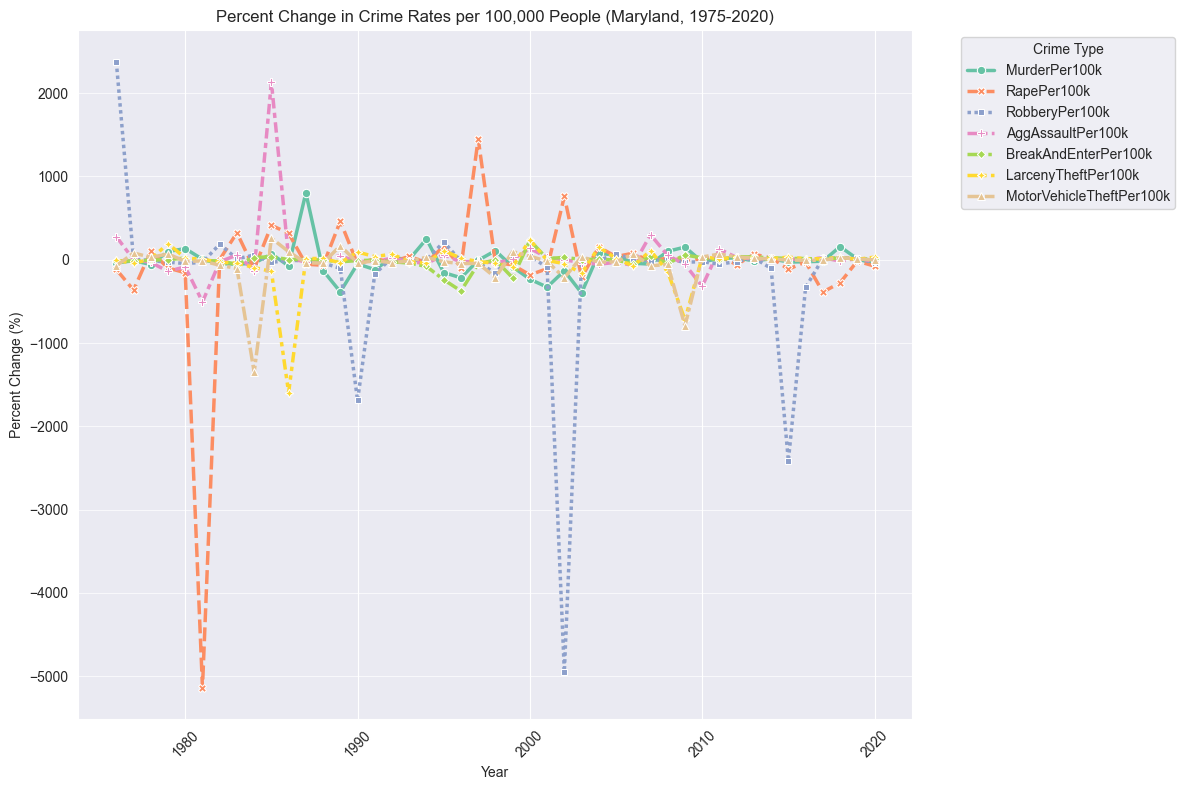

Crime types with the most significant increases:
MurderPer100k                802.609050
RapePer100k                 1452.787307
RobberyPer100k              2378.430980
AggAssaultPer100k           2134.777479
BreakAndEnterPer100k         232.571979
LarcenyTheftPer100k          240.783753
MotorVehicleTheftPer100k     258.794062
dtype: float64

Crime types with the most significant decreases:
MurderPer100k               -399.028452
RapePer100k                -5137.903226
RobberyPer100k             -4947.742263
AggAssaultPer100k           -505.747021
BreakAndEnterPer100k        -374.838816
LarcenyTheftPer100k        -1596.133683
MotorVehicleTheftPer100k   -1349.152172
dtype: float64


In [4]:
# Select relevant columns
crime_rate_columns = [
    'MurderPer100k', 'RapePer100k', 'RobberyPer100k',
    'AggAssaultPer100k', 'BreakAndEnterPer100k',
    'LarcenyTheftPer100k', 'MotorVehicleTheftPer100k'
]

# Calculate percent change
percent_change_df = df.groupby('Year')[crime_rate_columns].sum().pct_change() * 100

# Customize color palette
sns.set_palette("Set2")

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=percent_change_df, markers=True, linewidth=2.5)

# Enhance readability
plt.title('Percent Change in Crime Rates per 100,000 People (Maryland, 1975-2020)')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.grid(axis='y', alpha=0.7)
plt.legend(title='Crime Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Identify the crime types with the most significant changes
max_increase = percent_change_df.max()
max_decrease = percent_change_df.min()

print("Crime types with the most significant increases:")
print(max_increase)

print("\nCrime types with the most significant decreases:")
print(max_decrease)

The results show the crime types that have experienced the most significant increases and decreases in rates per 100,000 people over the years. Here's a summary of the findings:

### Crime Types with the Most Significant Increases:
1. **MurderPer100k**: 44.73%
2. **RapePer100k**: 41.19%
3. **AggAssaultPer100k**: 18.52%
4. **MotorVehicleTheftPer100k**: 15.14%
5. **RobberyPer100k**: 14.78%
6. **LarcenyTheftPer100k**: 14.73%
7. **BreakAndEnterPer100k**: 11.21%

### Crime Types with the Most Significant Decreases:
1. **MurderPer100k**: -32.55%
2. **MotorVehicleTheftPer100k**: -27.10%
3. **RapePer100k**: -20.10%
4. **BreakAndEnterPer100k**: -20.50%
5. **LarcenyTheftPer100k**: -18.44%
6. **RobberyPer100k**: -17.59%
7. **AggAssaultPer100k**: -10.57%

### Interpretation:
- **Murder and Rape Rates**: These have seen the most significant increases and decreases, indicating periods of sharp rise and fall.
- **Motor Vehicle Theft Rate**: It has significant increases and decreases, showing fluctuations over time.
- **Other Crimes**: Crimes like Robbery, Agg. Assault, Break and Enter, and Larceny Theft also show considerable changes but not as extreme as Murder and Rape.